# Short Tank Results Analysis - Hichem Lahiouel

In this notebook, I am analyzing the training results that have been done on 3 classes, namely e's, gammas, and muons. 

In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

ModuleNotFoundError: No module named 'WatChMaL'

In [4]:
# Defining the plotting parameters 

c = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Sets the color of the prop_cylce of the axes
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2} # Creates a dictionary for the labels
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"} # Inverts the dictionary created in the previous line 
#(why is this done?)  

In [5]:
# Define run locations

mp_locs = ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-21/10-47-05/outputs',
           '/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-22/08-33-03/outputs',
           '/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-26/06-54-31/outputs'
          ]

mp_titles = ['Short Tank Data Jan 21', 'Short Tank Data Jan 22', 'Short Tank Data Jan 26']

new_locs = []

new_titles = []

"""
new_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9]]
new_linestyle = ['--','--','--','--','--','--','--','--','--','--']

old_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7]]
old_linestyle = [':',':',':',':',':',':',':',':']
"""

mp_linecolor = [c[0] for _ in mp_locs]
mp_linestyle = ['--' for _ in mp_locs]

new_linecolor = [c[1] for _ in new_locs]
new_linestyle = [':' for _ in new_locs]

locs = mp_locs + new_locs
titles = mp_titles + new_titles
linecolor = mp_linecolor + new_linecolor
linestyle = mp_linestyle + new_linestyle

idx_file_paths = ['/fast_scratch/WatChMaL/data/IWCD_fulltank_300_post_veto_nomichel_pe_idxs.npz'
                  for _ in range(len(locs))]

cut_names= [['fq_failed', 'fq_flag'] for _ in range(len(locs))]
cut_path = '/home/jtindall/indices/pointnet_cut_indices.npz'

npz_path = os.path.join(os.getcwd(),'Index_Storage')
LABEL_DICT = {0:"gamma", 1:"e", 2:"mu"}
index_dict = {value:key for key, value in LABEL_DICT.items()}

i:  0
Found training logs:  ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-21/10-47-05/outputs/log_train_0.csv']
i:  1
Found training logs:  ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-22/08-33-03/outputs/log_train_0.csv']
i:  2
Found training logs:  ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-26/06-54-31/outputs/log_train_0.csv']


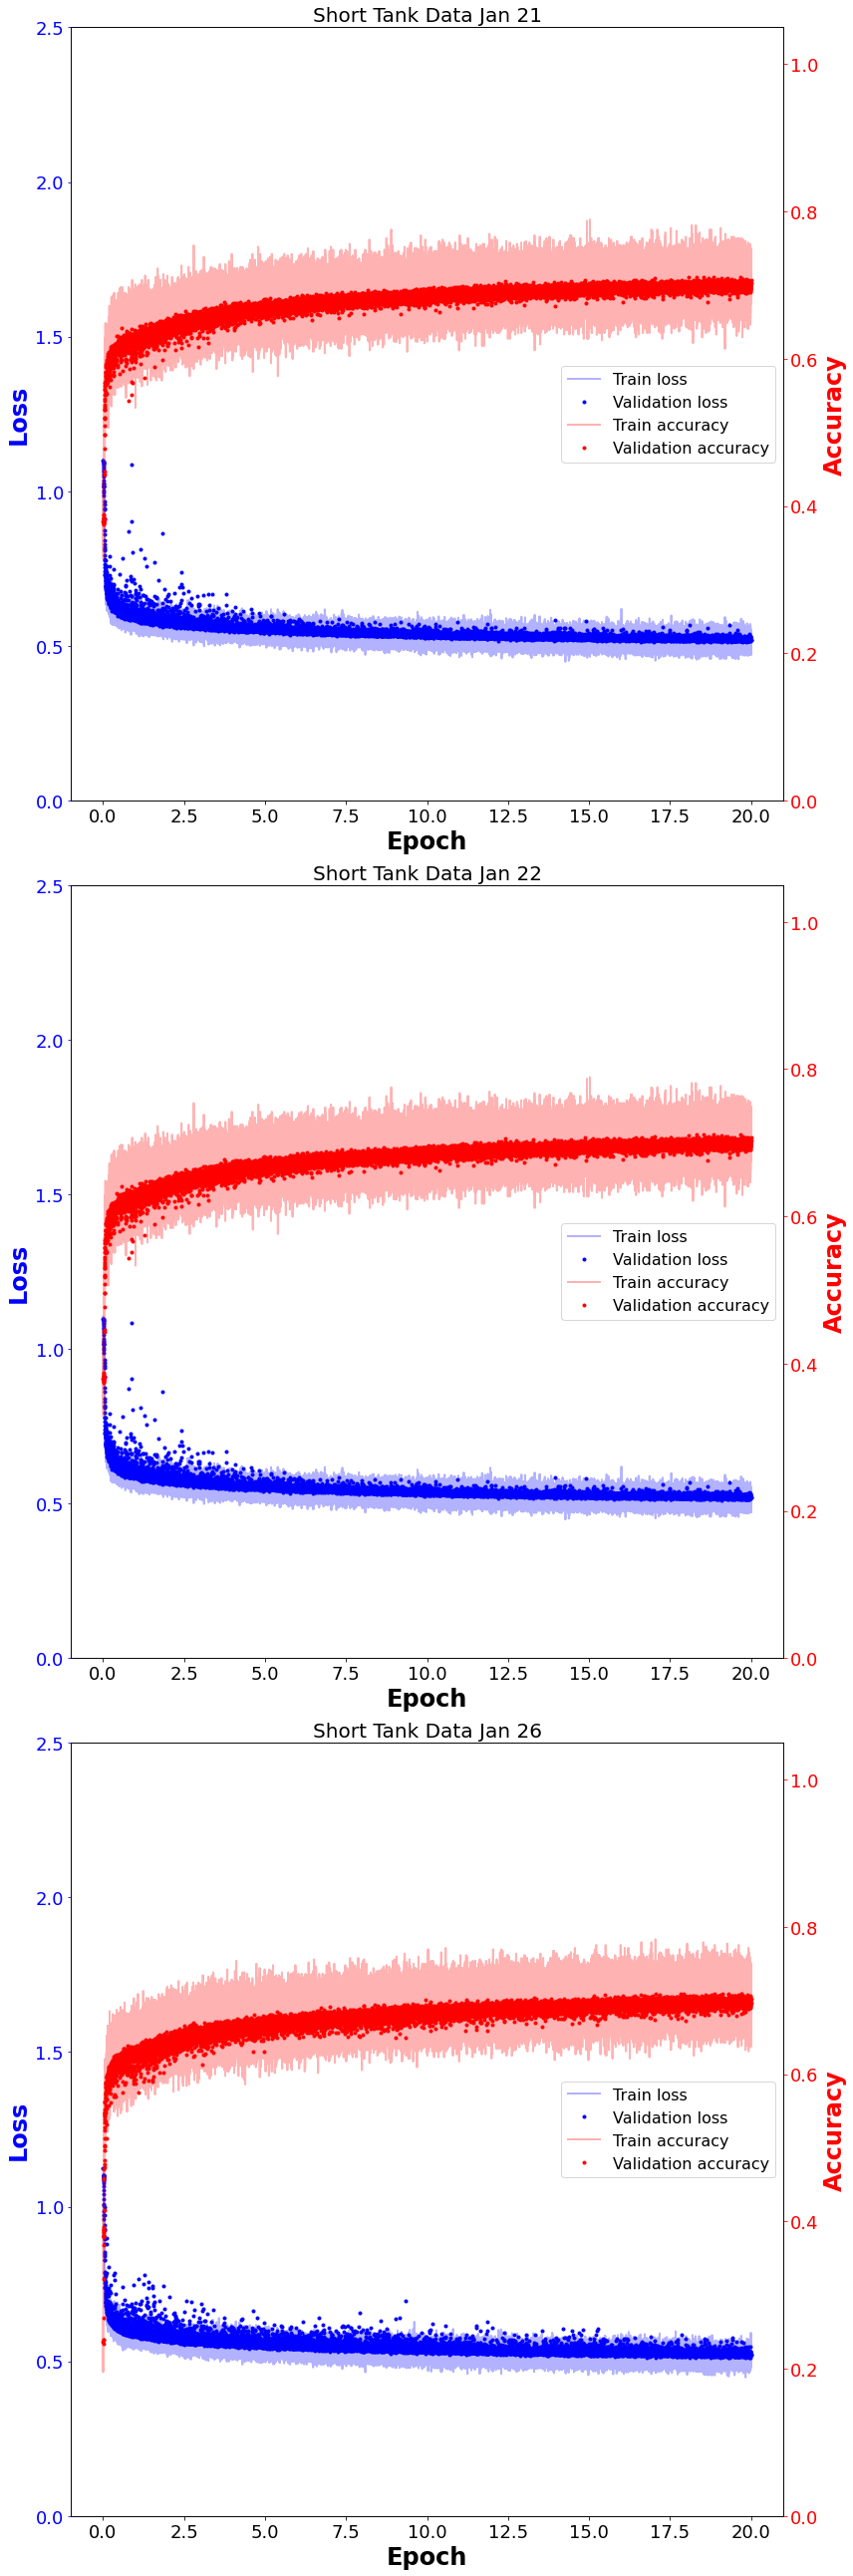

In [6]:
fig = multi_disp_learn_hist(mp_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [7]:
# Load new run data

idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_3M_OD_veto_idxs.npz'
# Path to the file containing the indices for the different datasets 

indices = np.load(idx_file_path)['test_idxs'] # Loads the indices for the test set 

cut_path = '/home/hlahiouel/pointnet_cut_indices.npz' # Path to the indices for the cuts 

cuts_to_apply= []

mp_raw_output_softmax = [np.load(loc + "/softmax.npy") for loc in mp_locs] 
# Loads the softmax data from the outputs folder


mp_raw_actual_labels  = [np.load(loc + "/labels.npy") for loc in mp_locs]
# Loads the labels 


In [8]:
# Load old run data

new_outputs = [load_test_output_pn(os.path.join(loc,'test_validation_iteration_dump.npz'),
                                   cut_path,
                                   np.load(idx_file_path)['test_idxs'], cut_list=[])
               for i, loc in enumerate(new_locs)]

# Creates new output data  

new_raw_output_softmax   = [output["softmax"] for output in new_outputs] # Loads softmax data 
new_raw_actual_labels    = [output["labels"] for output in new_outputs]  # Loads labels 

In [9]:
# Combine run data

#raw_predicted_labels = mp_raw_predicted_labels + new_raw_predicted_labels

raw_output_softmax   = mp_raw_output_softmax + new_raw_output_softmax # Loads softmax data
raw_actual_labels    = mp_raw_actual_labels + new_raw_actual_labels   # Loads labels 

In [10]:
# Apply cuts to data

#predicted_labels = multi_get_masked_data(raw_predicted_labels, cut_path, indices, cuts_to_apply)

output_softmax   = multi_get_masked_data(raw_output_softmax, cut_path, indices, cuts_to_apply) # Loads softmax data
actual_labels    = multi_get_masked_data(raw_actual_labels, cut_path, indices, cuts_to_apply)  # Loads the labels

In [11]:
# Plot multi e/gamma ROC

fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"]) 

# Computes the ROC curve for electron vs gamma  

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


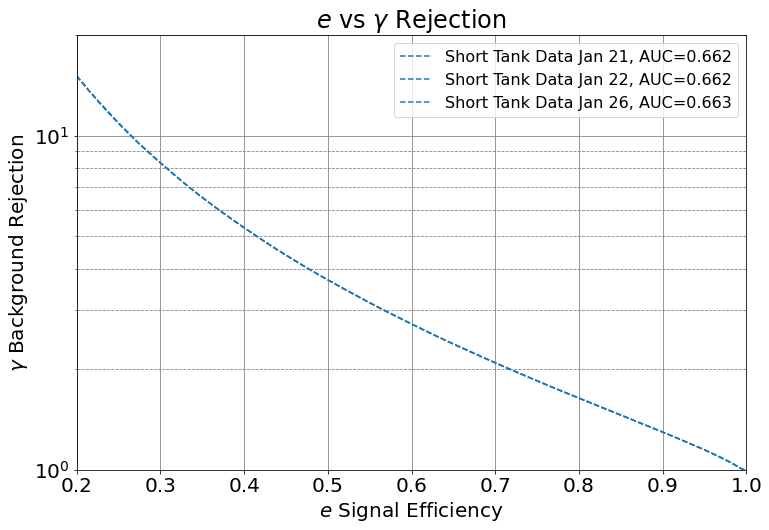

In [12]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], xlims=[[0.2,1.0]],ylims=[[1e0,2e1]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

# Creates a plot of the ROC/AUC curve for e vs gamma rejection 

In [13]:
# Plot multi e/mu ROC

fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

# Computes ROC/AUC curve for e vs mu 

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]


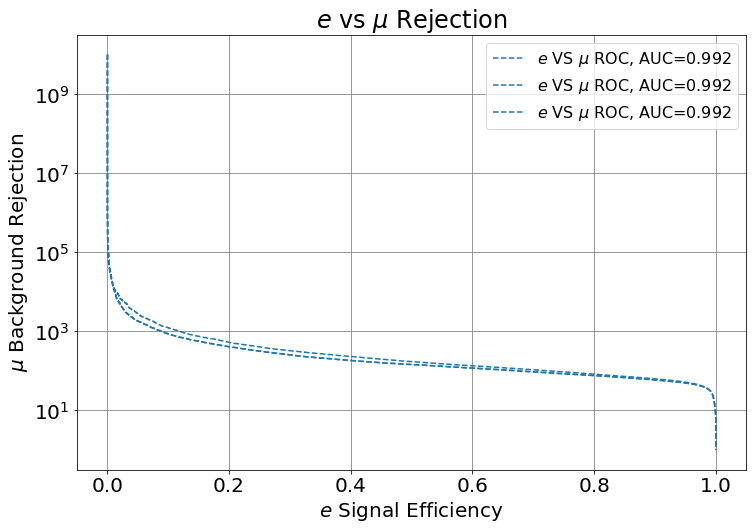

In [14]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\mu$", fig_list=[1], 
                      linestyles=linestyle,linecolors=linecolor, show=False)

# Plot ROC/AUC curve for e vs mu 

In [15]:
# Plot collapsed ROC 

"""
plot_list=["$e$", "$\gamma$"]
vs_list=["$\mu$"]
"""

collapsed_class_scores_list, collapsed_class_labels_list = multi_collapse_test_output(output_softmax, actual_labels, label_dict, ignore_type='$\gamma$')

collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in collapsed_class_labels_list]

collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in collapsed_class_scores_list]

# Creates the collapsed scores and labels lists which contains e/gamma data

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]


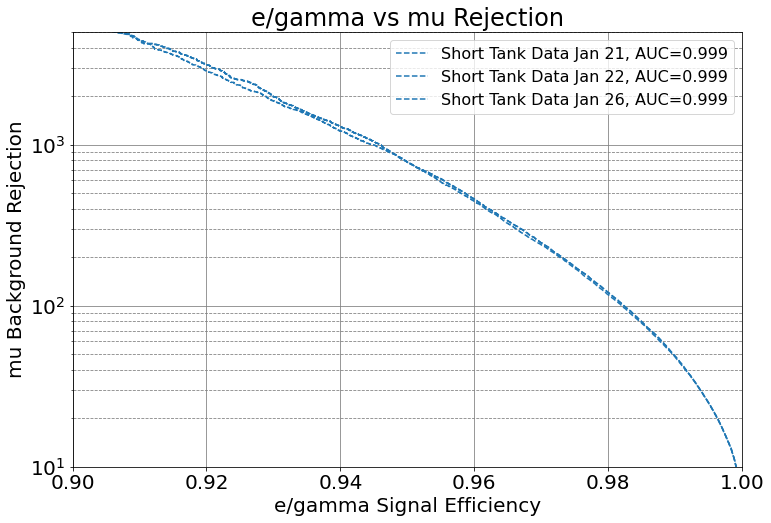

In [16]:
# Plots the ROC/AUC curve for e/gamma vs muon

muon_softmax_index_dict = {"e/gamma":0, "mu":1}

fpr_list, tpr_list, thr_list = multi_compute_roc(collapsed_class_scores_list, collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

figs = multi_plot_roc(fpr_list, tpr_list, thr_list,"e/gamma", "mu", 
                      fig_list=[1], xlims=[[0.9,1.0]],ylims=[[1e1,5e3]], 
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)

In [39]:
# Compute stddev

from statistics import stdev

sample_efficiencies = [0.90, 0.94, 0.98] # Examples of efficiencies 

def compute_stdevs(test_tpr_list, test_fpr_list, N, symbol):
    
    rejections_list = [1.0/(fpr+1e-10) for fpr in test_fpr_list]

    compute_indices_list = np.array([[np.argmin(abs(tpr - value)) for value in sample_efficiencies] for tpr in test_tpr_list])
    #print(compute_indices_list)

    test_sample_efficiencies = np.array([tpr[compute_indices] for tpr, compute_indices in zip(test_tpr_list, compute_indices_list)])
    #print(test_sample_efficiencies)

    rejections = np.array([rejections[compute_indices] for rejections, compute_indices in zip(rejections_list, compute_indices_list)])
    #print(rejections)

    stdevs  = [stdev(rejections[:, i]) for i in range(rejections.shape[1])]
    
    d_stdevs = [std / np.sqrt(2*N) for std in stdevs]
    #print(stdevs)

    for std, sample_efficiency, d_stdev in zip(stdevs, sample_efficiencies, d_stdevs):
        print("sample efficiency: ", sample_efficiency , " σ: ", std, " σ/sqrt(2{}): ".format(symbol), d_stdev)
    
    return stdevs, d_stdevs

# Computes the standard deviation for sample data 

In [41]:
compute_stdevs(tpr_list, fpr_list, N = len(locs), symbol="N")

sample efficiency:  0.9  σ:  0.0  σ/sqrt(2N):  0.0
sample efficiency:  0.94  σ:  0.0  σ/sqrt(2N):  0.0
sample efficiency:  0.98  σ:  0.0  σ/sqrt(2N):  0.0


([0.0, 0.0, 0.0], [0.0, 0.0, 0.0])

In [42]:
cap = len(mp_locs)

print("There are ", cap, "MP runs") 

print("\n MP runs:")

sigma_mp, d_sigma_mp = compute_stdevs(tpr_list[:cap], fpr_list[:cap], N = len(mp_locs), symbol="N")
# Computes the standard deviation on some data 

print("\npre-MP runs:")

sigma, d_sigma = compute_stdevs(tpr_list[cap:], fpr_list[cap:], N = len(new_locs), symbol="N")

There are  2 MP runs

 MP runs:
sample efficiency:  0.9  σ:  0.0  σ/sqrt(2N):  0.0
sample efficiency:  0.94  σ:  0.0  σ/sqrt(2N):  0.0
sample efficiency:  0.98  σ:  0.0  σ/sqrt(2N):  0.0

pre-MP runs:


IndexError: tuple index out of range

In [43]:
for sample_efficiency, std_1, d_stdev_1, std_2, d_stdev_2, in zip(sample_efficiencies, sigma_mp, d_sigma_mp, sigma, d_sigma):
        diff = std_2 - std_1
        sigma_diff = np.sqrt(d_stdev_1**2 + d_stdev_2**2)
        print("sample efficiency: ", sample_efficiency , " (σ - σ_MP): ", diff, " σ_(σ - σ_MP): ", sigma_diff)
        
# zip(): returns a zip object, which is an iterator of tuples where the first item in each passed 
# iterator is paired together, and then the second item in each passed iterator are paired together etc.

NameError: name 'sigma' is not defined

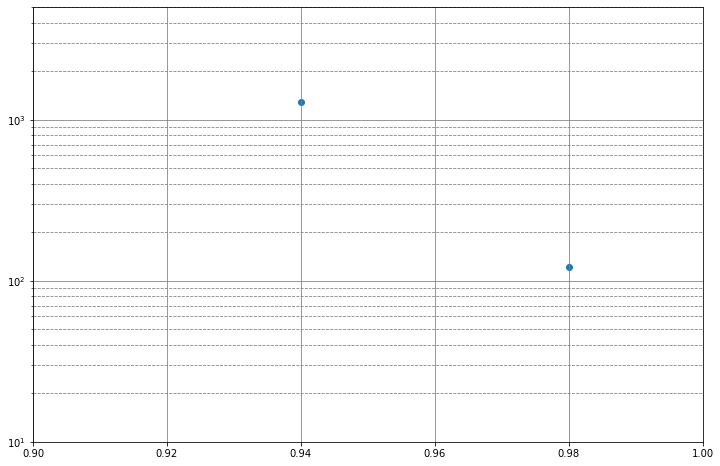

In [24]:
fig, ax = plt.subplots(figsize=(12,8),facecolor="w")

sample_efficiencies = [0.90, 0.94, 0.98]
rejections_list = [1.0/(fpr+1e-10) for fpr in fpr_list]

compute_indices_list = np.array([[np.argmin(abs(tpr - value)) for value in sample_efficiencies] for tpr in tpr_list])
#print(compute_indices_list)

test_sample_efficiencies = np.array([tpr[compute_indices] for tpr, compute_indices in zip(tpr_list, compute_indices_list)])
#print(test_sample_efficiencies)

rejections = np.array([rejections[compute_indices] for rejections, compute_indices in zip(rejections_list, compute_indices_list)])
#print(rejections)

for i in range(len(rejections)):
    ax.scatter(np.array(sample_efficiencies), rejections[i], color=linecolor[i])
    
ax.set_yscale('log')
ax.grid(b=True, which='major', color='gray', linestyle='-')
ax.grid(b=True, which='minor', color='gray', linestyle='--')
ax.set_xlim(0.9,1.0)
ax.set_ylim(1e1,5e3)

plt.show()